# Explore Intensive Care Dataset

This notebook is used to explore the `nice-covid-19-intensive-care.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/nice-covid-19-intensive-care.csv")

In [3]:
df["Datum"] = pd.to_datetime(df["Datum"])
df["IntensiveCare"] = df["IntensiveCare"].astype(int)
df["OpgenomenCumulatief"] = df["OpgenomenCumulatief"].astype(int)
df["NieuwOpgenomenVerdacht"] = df["NieuwOpgenomenVerdacht"].astype(int)
df["NieuwOpgenomenBewezen"] = df["NieuwOpgenomenBewezen"].astype(int)
df["OverleeftCumulatief"] = df["OverleeftCumulatief"].astype(int)
df["OverledenCumulatief"] = df["OverledenCumulatief"].astype(int)
df["Opgenomen"] = df["Opgenomen"].astype(int)

In [4]:
df["Overleden"] = df["OverledenCumulatief"].diff()
df["Overleeft"] = df["OverleeftCumulatief"].diff()

## Inspect dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datum                   341 non-null    datetime64[ns]
 1   IntensiveCare           341 non-null    int64         
 2   NieuwOpgenomenVerdacht  341 non-null    int64         
 3   OverleeftCumulatief     341 non-null    int64         
 4   Opgenomen               341 non-null    int64         
 5   OpgenomenCumulatief     341 non-null    int64         
 6   NieuwOpgenomenBewezen   341 non-null    int64         
 7   OverledenCumulatief     341 non-null    int64         
 8   Overleden               340 non-null    float64       
 9   Overleeft               340 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 26.8 KB


In [6]:
df.head()

,Datum,IntensiveCare,NieuwOpgenomenVerdacht,OverleeftCumulatief,Opgenomen,OpgenomenCumulatief,NieuwOpgenomenBewezen,OverledenCumulatief,Overleden,Overleeft
0,2020-02-27,10,0,0,16,16,1,0,NaN,NaN
1,2020-02-28,11,1,0,17,17,0,0,0.0,0.0
2,2020-02-29,11,0,0,18,18,0,0,0.0,0.0
3,2020-03-01,12,0,0,20,20,2,0,0.0,0.0
4,2020-03-02,11,0,0,19,20,0,0,0.0,0.0


In [7]:
df.tail()

,Datum,IntensiveCare,NieuwOpgenomenVerdacht,OverleeftCumulatief,Opgenomen,OpgenomenCumulatief,NieuwOpgenomenBewezen,OverledenCumulatief,Overleden,Overleeft
336,2021-01-28,76,1,4446,662,7841,40,2220,9.0,25.0
337,2021-01-29,76,0,4471,659,7871,28,2236,16.0,25.0
338,2021-01-30,76,0,4482,644,7901,28,2243,7.0,11.0
339,2021-01-31,76,1,4487,657,7935,32,2250,7.0,5.0
340,2021-02-01,76,0,4496,647,7947,10,2253,3.0,9.0


## Visualize hospitalized per day

<AxesSubplot:xlabel='Datum'>

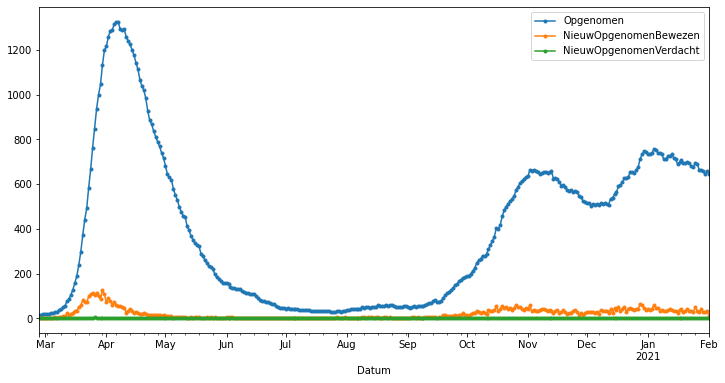

In [8]:
df.plot(
    x="Datum",
    y=["Opgenomen", "NieuwOpgenomenBewezen", "NieuwOpgenomenVerdacht"],
    figsize=(12,6),
    style=".-",
)

## Visualize intensive care usage per day

<AxesSubplot:xlabel='Datum'>

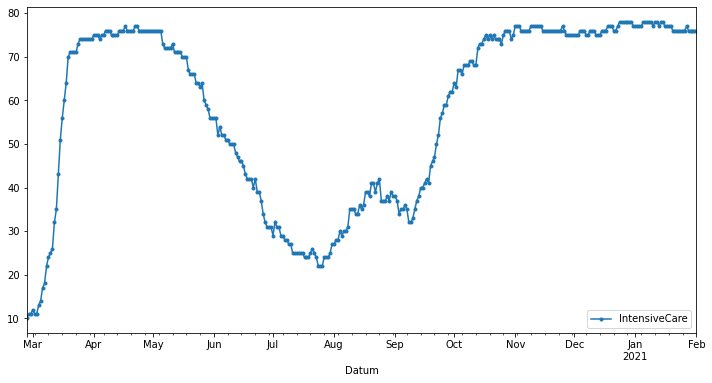

In [9]:
df.plot(
    x="Datum",
    y=["IntensiveCare"],
    figsize=(12,6),
    style=".-",
)

## Visualize cases per day

<AxesSubplot:xlabel='Datum'>

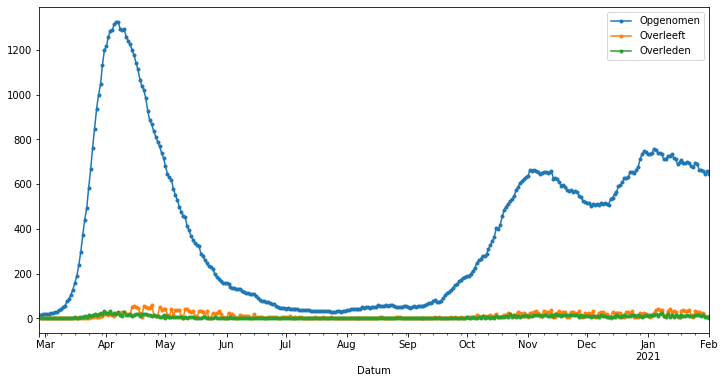

In [10]:

df.plot(
    x="Datum",
    y=["Opgenomen", "Overleeft", "Overleden"],
    figsize=(12,6),
    style=".-",
)

## Visualize cumulative per day

<AxesSubplot:xlabel='Datum'>

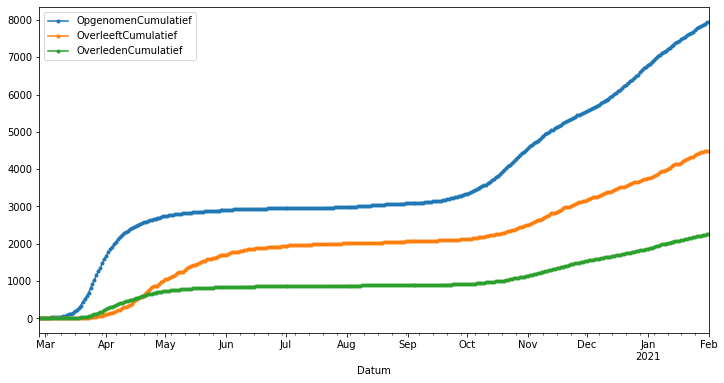

In [11]:
df.plot(
    x="Datum",
    y=["OpgenomenCumulatief", "OverleeftCumulatief", "OverledenCumulatief"],
    figsize=(12,6),
    style=".-",
)